# <span style='background-color: #fff5b1'>오늘의 한 걸음  🚶🏽‍♂️: OCR 다양하게 구현해보기</span>

## Contexts

### 1. READY
    1-1 오늘의 Exp와 Rubric  
    1-2 사용하는 라이브러리  

### 2. GAME
    2-1. 데이터 준비
    2-2. Keras-OCR  
    2-3. Tesseract  
    2-4. 데이터 평가   

### 3. POTG (best Play Of The Game
    3-1. 소감(POTG)  
    3-2. 어려웠던 점과 극복방안  
    3-3. 추후  

---


# 1. Ready
## 1-1. 오늘의 Exp와 Rubric


OCR 은 Optical Character Reader 로서, 이미지로 이루어진 글자를  
컴퓨터가 발견하고 인식하도록 만든 프로그램을 말한다.

정말 많은 발전이 있었다. 이제는 오픈소스를 통해서도 이러한 기술을 구현할 수 있다.  

오늘 우리는 두 가지 방법으로 OCR 을 구현하려고 한다. 

1. Keras-OCR
2. Tesseract

오늘의 Rubric 은 다음과 같다.

|평가문항|상세기준|
|---|---|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|


## 1-2. 사용하는 라이브러리

In [12]:
import os

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import keras_ocr

import pytesseract
from pytesseract import Output


print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


# 2. GAME
## 2-1. 데이터 준비

OCR 프로그램을 착용하기 위해 논문 자료와 간판 이미지를 가져왔다. 나의 경우  
PDF 파일로 되어있는 논문을 더 쉽게 번역하기 위해 OCR 프로그램으로 텍스트만 뽑아와 저장할 수 있는  
프로그램을 만들고 싶었다. 그래서 논문 이미지를 가져왔으며,  
간판은 두 가지 방법의 정확도를 명확하게 비교하기 위해 가져왔다.

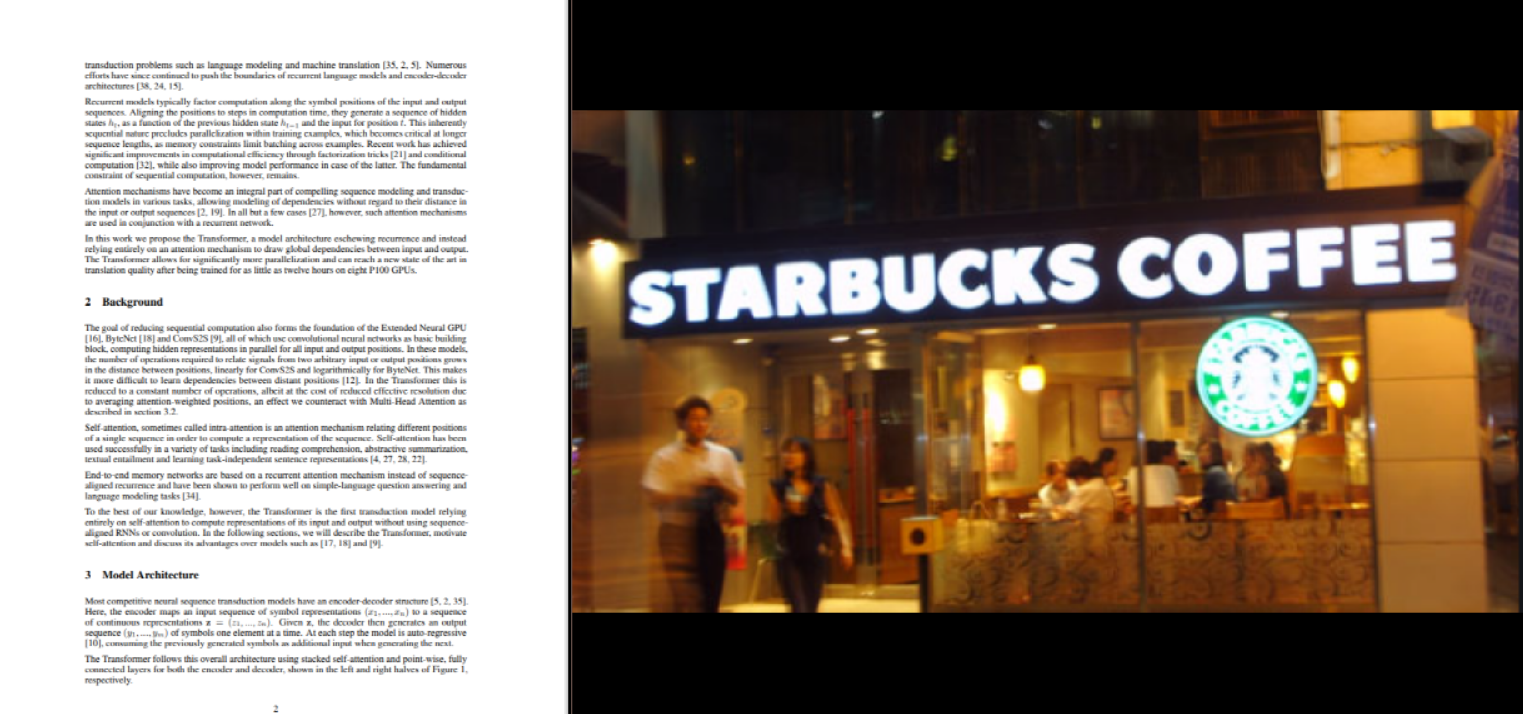

## 2-2. Keras-OCR

In [2]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [3]:
image_path = os.getenv('HOME')+'/aiffel/workplace/E15/ocr_python'
img_file_path1 = image_path + '/paper1.PNG'
img_file_path2 = image_path + '/paper2.PNG'
img_file_path3 = image_path + '/image1.PNG'
img_file_path4 = image_path + '/image2.PNG'

image_urls = [
    img_file_path1,
    img_file_path2,
    img_file_path3,
    img_file_path4
    ]


images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

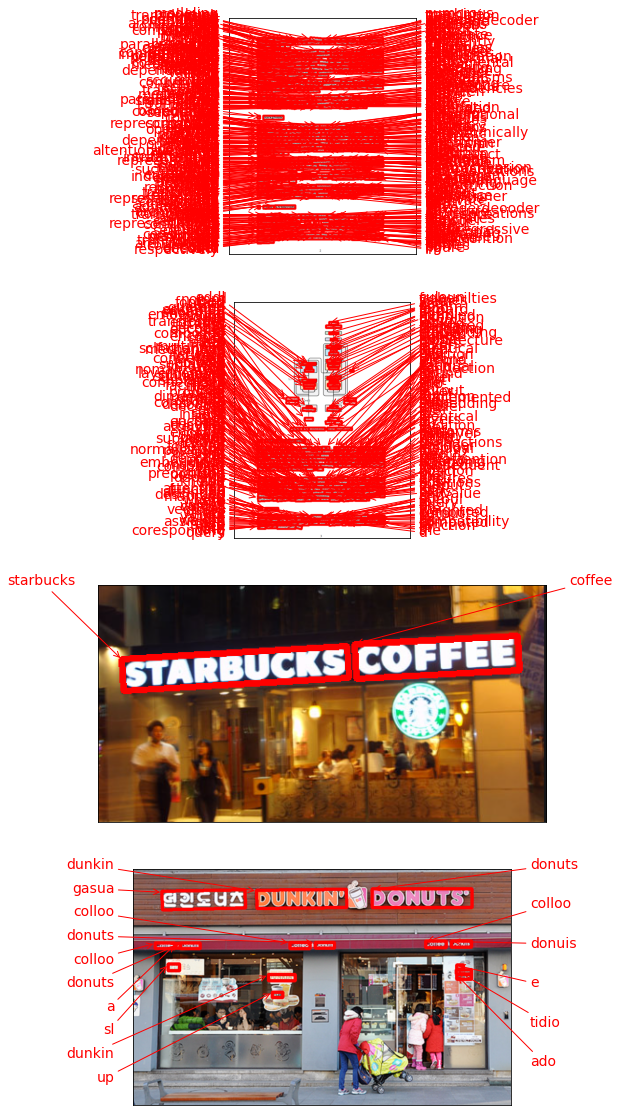

In [4]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 2-3.Tesseract

In [6]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/workplace/E15/ocr_python'
img_file_path = work_dir + '/paper1.PNG'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/workplace/E15/ocr_python/0000.png
/aiffel/aiffel/workplace/E15/ocr_python/0001.png
/aiffel/aiffel/workplace/E15/ocr_python/0002.png
/aiffel/aiffel/workplace/E15/ocr_python/0003.png
/aiffel/aiffel/workplace/E15/ocr_python/0004.png
/aiffel/aiffel/workplace/E15/ocr_python/0005.png
/aiffel/aiffel/workplace/E15/ocr_python/0006.png
/aiffel/aiffel/workplace/E15/ocr_python/0007.png
/aiffel/aiffel/workplace/E15/ocr_python/0008.png
/aiffel/aiffel/workplace/E15/ocr_python/0009.png
/aiffel/aiffel/workplace/E15/ocr_python/0010.png
/aiffel/aiffel/workplace/E15/ocr_python/0011.png
/aiffel/aiffel/workplace/E15/ocr_python/0012.png
/aiffel/aiffel/workplace/E15/ocr_python/0013.png
/aiffel/aiffel/workplace/E15/ocr_python/0014.png
/aiffel/aiffel/workplace/E15/ocr_python/0015.png
/aiffel/aiffel/workplace/E15/ocr_python/0016.png
/aiffel/aiffel/workplace/E15/ocr_python/0017.png
/aiffel/aiffel/workplace/E15/ocr_python/0018.png
/aiffel/aiffel/workplace/E15/ocr_python/0019.png
/aiffel/aiffel/workp

/aiffel/aiffel/workplace/E15/ocr_python/0321.png
/aiffel/aiffel/workplace/E15/ocr_python/0322.png
/aiffel/aiffel/workplace/E15/ocr_python/0323.png
/aiffel/aiffel/workplace/E15/ocr_python/0324.png
/aiffel/aiffel/workplace/E15/ocr_python/0325.png
/aiffel/aiffel/workplace/E15/ocr_python/0326.png
/aiffel/aiffel/workplace/E15/ocr_python/0327.png
/aiffel/aiffel/workplace/E15/ocr_python/0328.png
/aiffel/aiffel/workplace/E15/ocr_python/0329.png
/aiffel/aiffel/workplace/E15/ocr_python/0330.png
/aiffel/aiffel/workplace/E15/ocr_python/0331.png
/aiffel/aiffel/workplace/E15/ocr_python/0332.png
/aiffel/aiffel/workplace/E15/ocr_python/0333.png
/aiffel/aiffel/workplace/E15/ocr_python/0334.png
/aiffel/aiffel/workplace/E15/ocr_python/0335.png
/aiffel/aiffel/workplace/E15/ocr_python/0336.png
/aiffel/aiffel/workplace/E15/ocr_python/0337.png
/aiffel/aiffel/workplace/E15/ocr_python/0338.png
/aiffel/aiffel/workplace/E15/ocr_python/0339.png
/aiffel/aiffel/workplace/E15/ocr_python/0340.png
/aiffel/aiffel/workp

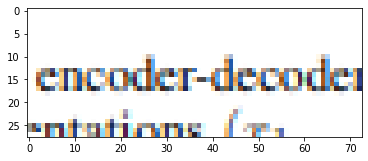

In [25]:
image_path = os.getenv('HOME')+'/aiffel/workplace/E15/ocr_python/0502.png'

# 경로에 해당하는 파일을 열고 numpy array로 변환

image_pil = Image.open(image_path)
image = np.array(image_pil)

plt.imshow(image)
plt.show()

총 593개의 글자 묶음이 검출되었다.

In [7]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

“transduction

problems

suc

ae

language

modeling

and

machine

translatio

35,2


NUMeTOUS

effort



continued

te

push

th

ge modell

°

ing mac

language

model

and

2h. Numerous

architectures

38,24

5]

Recurrent

model


factor

computatio


the

symbol


of the

np

an


MAY UCT




t


‘i


time



i

sequenc

a


state






hidden


hy

=




position ¢


‘This

Sequential


preclude






become

critical

-


sue

lena

sme


bach



Recent work bas achieved



achieved

<3

icant improvements in

in

computational



factorization

trick:




‘computati

(32




model


in ease

ol

the

Tater

Th

“fundamental

‘constrain

o

 sequentia

© also mney

mg mow

remains

“Atention

mechanism

av

becom

a

teers

pa

:

compellin

sequence

modelin

and transduc-

ston


it

various

tasks

allowing



dependencic


rega


In [17]:
work_dir = os.getenv('HOME')+'/aiffel/workplace/E15/ocr_python'
img_file_path = work_dir + '/image2.PNG'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/workplace/E15/ocr_python/0000.png
/aiffel/aiffel/workplace/E15/ocr_python/0001.png
/aiffel/aiffel/workplace/E15/ocr_python/0002.png
/aiffel/aiffel/workplace/E15/ocr_python/0003.png


검출된 이미지가 어떠한지 확인해보았다

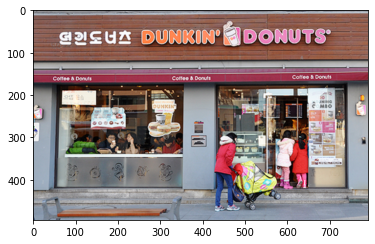

In [22]:
image_path = os.getenv('HOME')+'/aiffel/workplace/E15/ocr_python/0003.png'

# 경로에 해당하는 파일을 열고 numpy array로 변환

image_pil = Image.open(image_path)
image = np.array(image_pil)

plt.imshow(image)
plt.show()

In [19]:
recognize_images(cropped_image_path_list)

OOOO EE EEE ———VvV37_

ii i tii LEM mes i Oe

cc —§ I — — TT = © —


Done


## 2-4.데이터 평가

1. Keras-OCR  
같은 경우는 사진에서 특정 문구를 찾고 싶을 때 보기에는 타당하다. 하지만  
긴 문장이나 논문같은 글에서 모든 글을 뽑아 오기에는 한 단어 단어가 끊어지고  
보기에 어려우므로 무리가 있다고 판단한다.

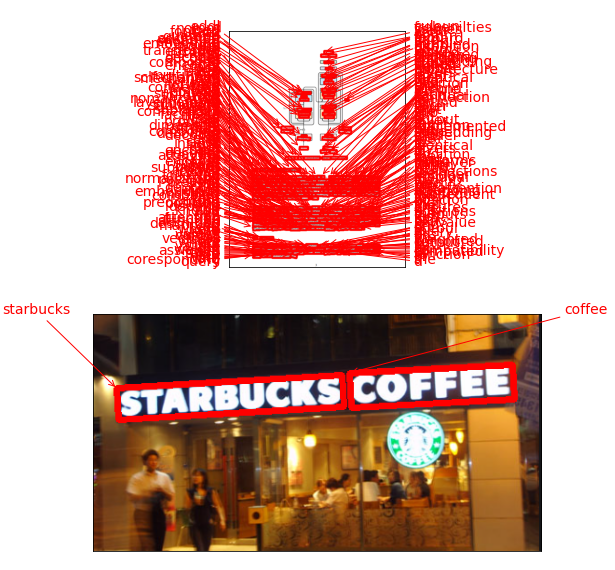

2. Tesseract  
같은 경우는 정확도 측면에서는 `keras` 에 비해 떨어진다. 하지만 좀 더 명확한 글(다채로운 폰트가 적용되지 않은 무난한 글) 이나 많은 문장에서 내용을 뽑아 사용하기에는 더 명확하다.

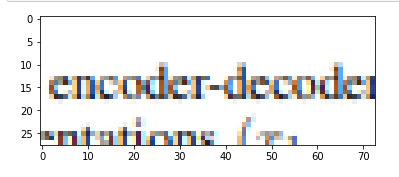

결과적으로 논문의 내용을 텍스트로 뽑아 관리하고 싶은 나의 경우는 
Tesseract를 사용함이 더 나을 것으로 고려된다.

# 3. POTG
## 3-1. 소감

#### "아, 내가 만든 OCR 은 시중 프로그램의 0.01%정도는 구현 가능하구나.."

시중의 OCR 은 텍스트를 정확하게 인식하여, 번역까지 하고, 심지어 해당 자리에 자연스럽게 삽입까지 해주는 기능까지 있습니다. 그에 비해 오늘 제가 만든 OCR 은 글자를

## 3-2. 어려웠던 점과 극복방안

1. Pipeline 설치 오류

처음부터 막혔었다.

`failed to allocate memory [Op:AddV2]` 라는 오류문이 나오며
파이프라인이 로딩되지 않았다.

인터넷 검색시에는 배치사이즈에 의한 GPU 용량 부족을 원인으로 들었으며,  
나는 해당 조건과는 맞지 않아(줄일 수 있는 배치사이즈를 설정하지 않았으므로)  
여러가지 시도를 해보았다.

결과적으로 다른 커널에서 구동중인 pipeline이 있는 경우 정상작동을 하지 않는 것으로
밝혀졌다.  

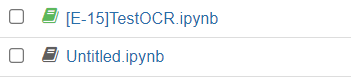

학습 시 다른 파일에서 `pipeline`을 작동중이면 pipeline을 불러올 수 없다,

## 3-3. 추후